In [1]:
import argparse
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
import os
import matplotlib.pyplot as plt
from numpy import array
import time
import math
import glob
import copy
import ast
from toolkit import *

In [2]:
test_cases = glob.glob('../data/*')

In [3]:
test_cases

['../data\\K_10_C_50_S_3.txt',
 '../data\\K_3_C_33_S_5.txt',
 '../data\\K_3_C_60_S_20.txt',
 '../data\\K_4_C_50_S_10.txt',
 '../data\\K_6_C_50_S_7.txt']

In [4]:
index = 3

In [5]:
with open(test_cases[index]) as f:
    E = f.readline()
    P = f.readline()
    edges = f.readline()

In [6]:
E = ast.literal_eval(E.strip('\n'))
P = ast.literal_eval(P.strip('\n'))
edges = ast.literal_eval(edges.strip('\n'))

In [7]:
edges2 = edges

In [8]:
C = len(P) - 1

inserting into a list at an index is O(n), but the look up is O(1). This is better than what I previously attempted which is adding to a dict O(1), and look up possibly being O(n).

In [9]:
adj = [0 for x in range(0, C)]

In [10]:
# add all values to a list 
for i in range(0, C):
        adj[i] = Node(i, adj_start = P[i])   

In [11]:
degree_doubly = [DoublyLinkedList() for x in range(0, C-1) ]

In [12]:
max_degree = 0 
# calculate degree
for i in range(0, C):
    deg = P[i + 1] - P[i]
    adj[i].degree = deg
    adj[i].degree_start = deg
    degree_doubly[deg].insert_at_start(adj[i])
    if deg > max_degree:
        max_degree = deg

In [13]:
ordered = LinkedList()

In [14]:
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G,k=0.25,iterations=25)

In [15]:

def smallest_last_deletion(i=None, start=None, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, debug=True, pos = pos):
        n = degree_doubly[i].start_node
        next_check = copy.copy(start)
        left_over = False
        while n is not None:
    
            print('new i:', i)
            if adj[n.course].deleted is None and i > 0:
               
                if debug:
                    debugger(adj=adj, degree_doubly=degree_doubly, n=n, max_degree=max_degree, pos=pos, edges=edges)


                adj[n.course].deleted = -1
                degree_doubly[i].delete_element_by_value(n.course)
                n.nref_degree_list = None
                n.pref_degree_list = None
                ordered.insert_at_start(n)
                ordered.traverse_list()
                degree_doubly[0].insert_at_start(n)
                adjacents = n.degree_start
                n.degree = 0
                next_check = copy.copy(i)
                updated_start = copy.copy(i)
                print(n.__dict__)
                for j in range(n.adj_start, n.adj_start + adjacents):
                    if adj[E[j]].deleted is None:
                        degree = adj[E[j]].degree
                        
                        
                        if adj[E[j]].pref_degree_list is None and adj[E[j]].nref_degree_list is None:
                            degree_doubly[degree].start_node = None
                        elif adj[E[j]].pref_degree_list is not None and adj[E[j]].nref_degree_list is None:
                            adj[E[j]].pref_degree_list.nref_degree_list = None
                        elif  adj[E[j]].pref_degree_list is None and adj[E[j]].nref_degree_list is not None:
                            degree_doubly[degree].start_node = adj[E[j]].nref_degree_list
                            adj[E[j]].nref_degree_list.pref_degree_list = None
                        elif adj[E[j]].pref_degree_list is not None and adj[E[j]].nref_degree_list is not None:
                            adj[E[j]].nref_degree_list.pref_degree_list = adj[E[j]].pref_degree_list
                            adj[E[j]].pref_degree_list.nref_degree_list = adj[E[j]].nref_degree_list
                        
                        adj[E[j]].nref_degree_list = None
                        adj[E[j]].pref_degree_list = None
                        degree_doubly[degree-1].insert_at_start(adj[E[j]])
                        adj[E[j]].degree = adj[E[j]].degree - 1
                        print(adj[E[j]].__dict__)
                        if adj[E[j]].degree == 0:
                            ordered.insert_at_start(adj[E[j]])
                            ordered.traverse_list()
                            adj[E[j]].deleted = -1
                            del pos[adj[E[j]].course]
                            print(adj[E[j]].__dict__)
                        print('start:', start)
                        if (adj[E[j]].degree < next_check or adj[E[j]].degree < start) and adj[E[j]].degree < updated_start:
                            next_check = adj[E[j]].degree
                            updated_start = adj[E[j]].degree
                        if (adj[E[j]].degree < next_check or adj[E[j]].degree < start) and adj[E[j]].degree > updated_start:
                            left_over = True
                            left_over_degree = adj[E[j]].degree
                        if adj[E[j]].degree == next_check:
                            i = i + 1
                        
                    
                del pos[n.course]
            
            if i > next_check:
                print('Case 1:', next_check)
                if next_check == 0:
                    next_check = start
                n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=next_check, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                if n == None:
                    break
                else:
                    n = n.nref_degree_list
            elif degree_doubly[i].start_node is not None:
                print('Case 2:')
                if next_check == 0:
                    next_check = start
                n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=next_check, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                if n == None:
                    break
                else:
                    n = n.nref_degree_list
            if left_over:
                if degree_doubly[left_over_degree].start_node is not None:
                    print('Case 3:')
#                     if next_check == 0:
#                         next_check = left_over_degree
                    n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=left_over_degree, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                    if n == None:
                        break
                    else:
                        n = n.nref_degree_list
                elif degree_doubly[left_over_degree - 1].start_node is not None:
                    print('Case 4:')
#                     if next_check == 0:
#                         next_check = left_over_degree - 1
                    n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=left_over_degree - 1, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                    if n == None:
                        break
                    else:
                        n = n.nref_degree_list
            else:
                i = start
                print('Continue...')
                n = degree_doubly[i].start_node
                if n == None:
                    break
                else:
                    n = n.nref_degree_list
                
            
            
        return n, adj, degree_doubly, ordered, pos

------------------ 1
------------------ 2
------------------ 3
new i: 3
course: 49
list:  0
[48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[49, 47, 45, 44, 42, 40, 34, 33, 31, 30, 25, 23, 14, 13, 10, 9, 8, 7, 3, 2, 0]
list:  4
List has no element
list:  5
List has no element
list:  6
[27, 22, 21, 16, 5, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[19]
list:  10
List has no element
list:  11
List has no element
list:  12
[18]


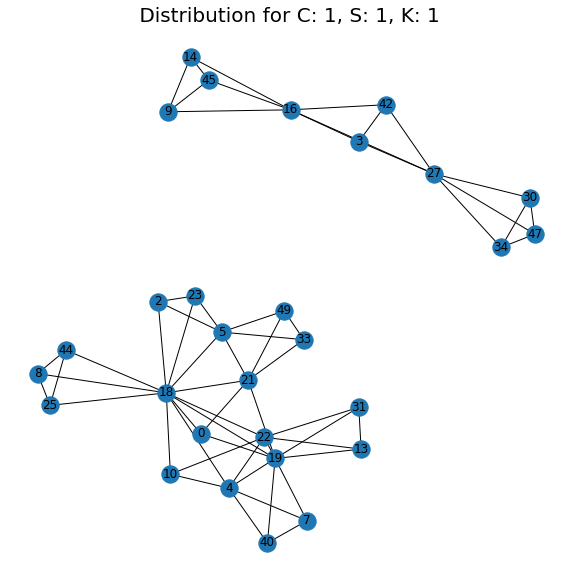

[49]
{'course': 49, 'adj_start': 117, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F9273C8>, 'pref_degree_list': None, 'color': -1, 'ref': None}
{'course': 5, 'adj_start': 15, 'degree': 5, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 21, 'adj_start': 66, 'degree': 5, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920AC8>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 33, 'adj_start': 96, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 33
list:  0
[49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
[33]
list:  3
[47, 45, 44, 42, 40, 34, 31, 30, 25, 23, 14, 13, 10, 9, 8, 7, 3, 2, 0]
list:  4
List has no element
list:  5
[21, 5]


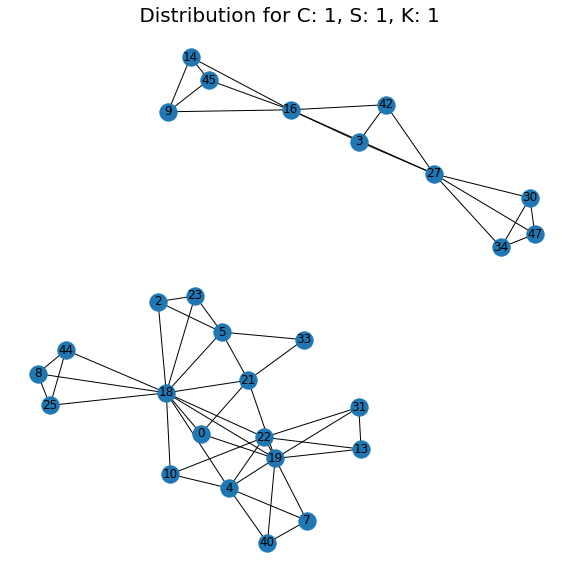

[33, 49]
{'course': 33, 'adj_start': 96, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F927400>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F927400>}
{'course': 5, 'adj_start': 15, 'degree': 4, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 21, 'adj_start': 66, 'degree': 4, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920AC8>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 45
list:  0
[33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[47, 45, 44, 42, 40, 34, 31, 30, 25, 23, 14, 13, 10, 9, 8, 7, 3, 2, 0]
list:  4
[21, 5]
list:  5
List has no element
list:  6
[27, 22, 16, 4]
list:  7
List has no element
list:  8
List has no element
list:  9


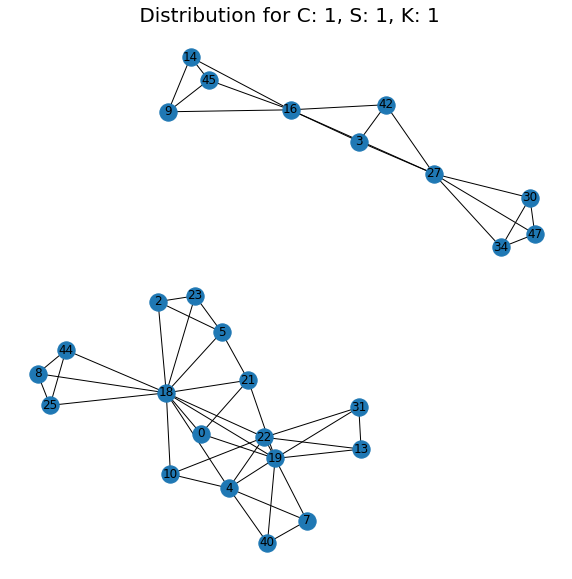

[45, 33, 49]
{'course': 45, 'adj_start': 111, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F927080>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F927080>}
{'course': 9, 'adj_start': 27, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 14, 'adj_start': 36, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920BA8>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 16, 'adj_start': 39, 'degree': 5, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 14
list:  0
[45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
[14, 9]
list:  3
[47, 44, 42, 40, 34, 31, 30, 25, 23, 13, 10, 8, 7, 3, 2, 0]

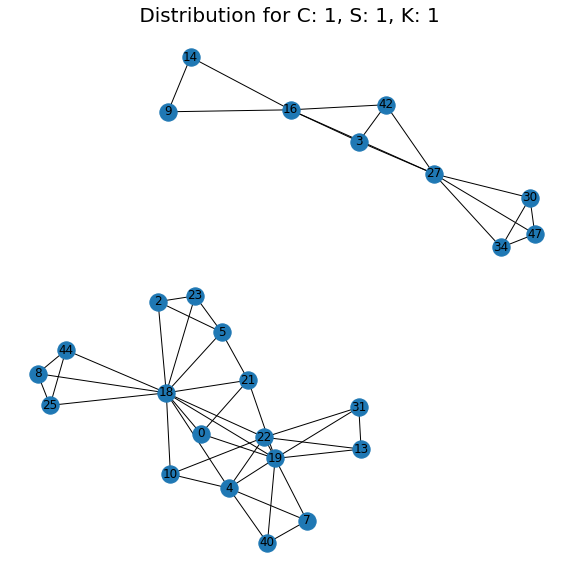

[14, 45, 33, 49]
{'course': 14, 'adj_start': 36, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F927320>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F927320>}
{'course': 9, 'adj_start': 27, 'degree': 1, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 16, 'adj_start': 39, 'degree': 4, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E48>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 1
new i: 1
course: 9
list:  0
[14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
[9]
list:  2
List has no element
list:  3
[47, 44, 42, 40, 34, 31, 30, 25, 23, 13, 10, 8, 7, 3, 2, 0]
list:  4
[16, 21, 5]
list:  5
List has no element
list:  6
[27, 22, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[19]
list:  10

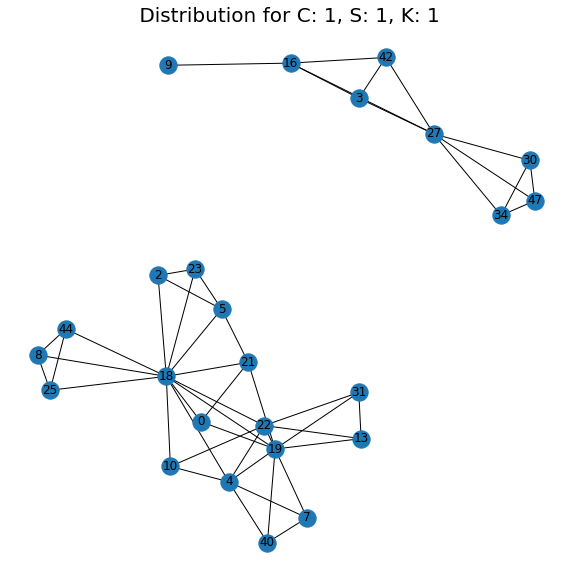

[9, 14, 45, 33, 49]
{'course': 9, 'adj_start': 27, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920CC0>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920CC0>}
{'course': 16, 'adj_start': 39, 'degree': 3, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F927390>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 47
list:  0
[9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[16, 47, 44, 42, 40, 34, 31, 30, 25, 23, 13, 10, 8, 7, 3, 2, 0]
list:  4
[21, 5]
list:  5
List has no element
list:  6
[27, 22, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[19]
list:  10
List has no element
list:  11
List has no element
list:  12
[18]


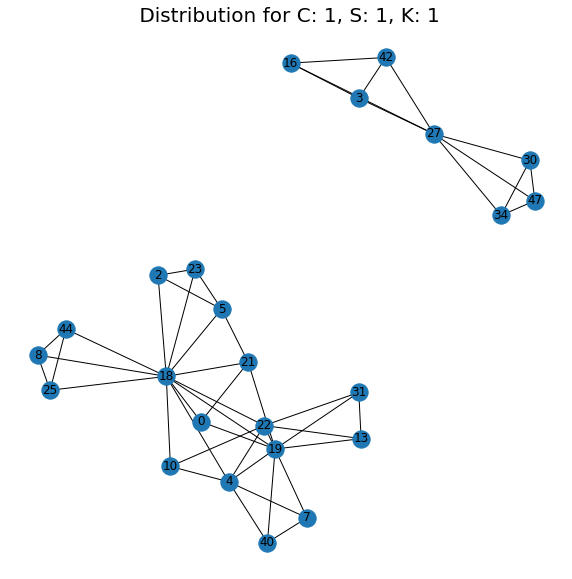

[47, 9, 14, 45, 33, 49]
{'course': 47, 'adj_start': 114, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920BA8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920BA8>}
{'course': 27, 'adj_start': 84, 'degree': 5, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 30, 'adj_start': 90, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 34, 'adj_start': 99, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920668>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 34
list:  0
[47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
[34, 30]
list:  3
[16, 44, 42, 40, 31, 25, 23, 13, 10

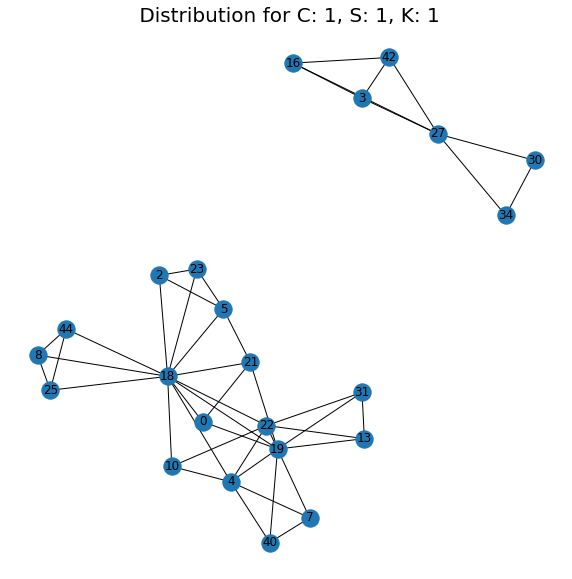

[34, 47, 9, 14, 45, 33, 49]
{'course': 34, 'adj_start': 99, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F927390>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F927390>}
{'course': 27, 'adj_start': 84, 'degree': 4, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E48>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 30, 'adj_start': 90, 'degree': 1, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 1
new i: 1
course: 30
list:  0
[34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
[30]
list:  2
List has no element
list:  3
[16, 44, 42, 40, 31, 25, 23, 13, 10, 8, 7, 3, 2, 0]
list:  4
[27, 21, 5]
list:  5
List has no element
list:  6
[22, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[

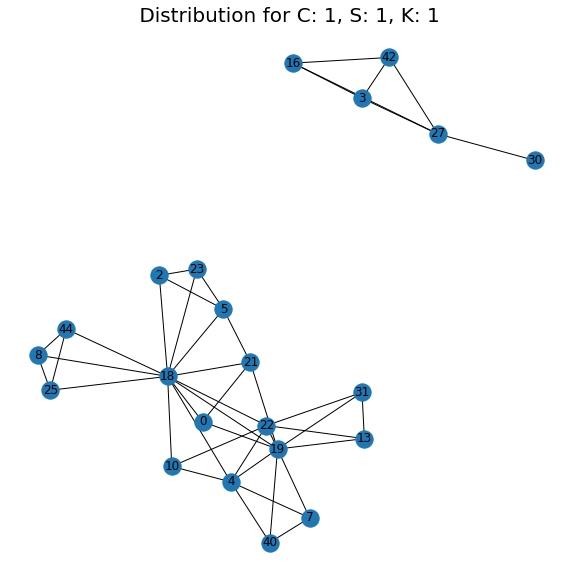

[30, 34, 47, 9, 14, 45, 33, 49]
{'course': 30, 'adj_start': 90, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F9270B8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F9270B8>}
{'course': 27, 'adj_start': 84, 'degree': 3, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920D30>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 16
list:  0
[30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[27, 16, 44, 42, 40, 31, 25, 23, 13, 10, 8, 7, 3, 2, 0]
list:  4
[21, 5]
list:  5
List has no element
list:  6
[22, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[19]
list:  10
List has no element
list:  11
List has no element
list:  12
[18]


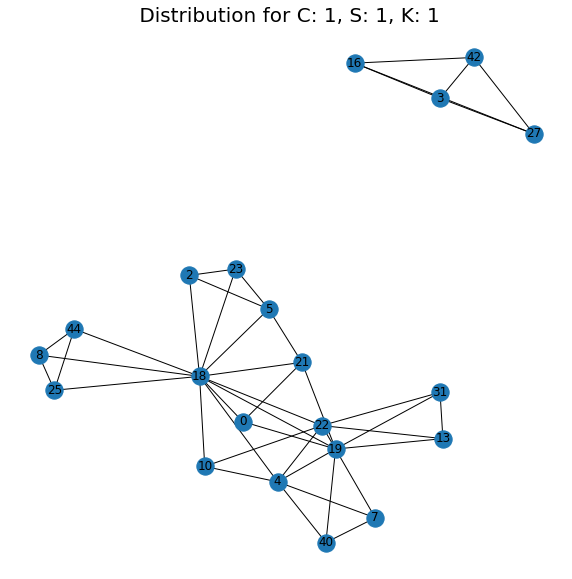

[16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 16, 'adj_start': 39, 'degree': 0, 'degree_start': 6, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920668>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920668>}
{'course': 3, 'adj_start': 6, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 27, 'adj_start': 84, 'degree': 2, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A58>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 42, 'adj_start': 105, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920F98>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 42
list:  0
[16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
l

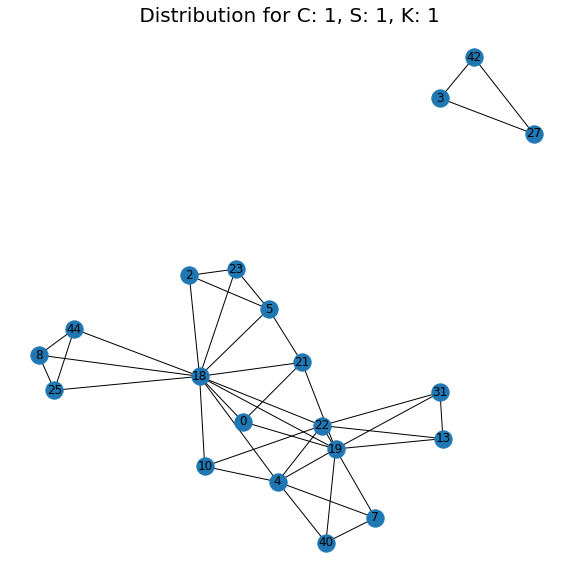

[42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 42, 'adj_start': 105, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920D30>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920D30>}
{'course': 3, 'adj_start': 6, 'degree': 1, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 27, 'adj_start': 84, 'degree': 1, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A58>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 1
new i: 1
course: 27
list:  0
[42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
[27, 3]
list:  2
List has no element
list:  3
[44, 40, 31, 25, 23, 13, 10, 8, 7, 2, 0]
list:  4
[21, 5]
list:  5
List has no element
list:  6
[22, 4]
list:  7
List has no element
list:  8
List has no element

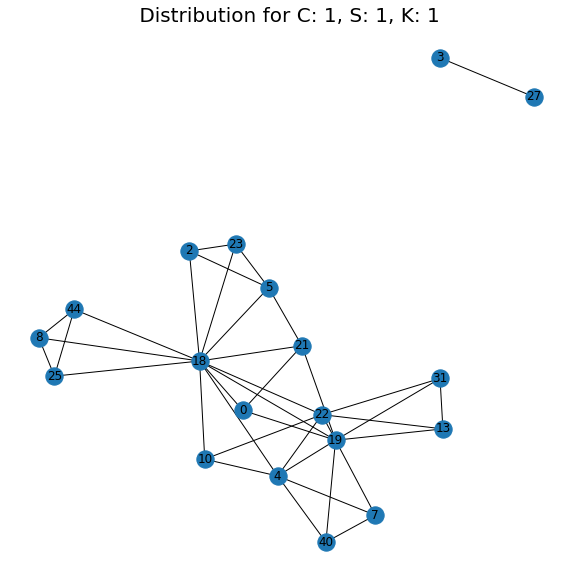

[27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 27, 'adj_start': 84, 'degree': 0, 'degree_start': 6, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F927278>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F927278>}
{'course': 3, 'adj_start': 6, 'degree': 0, 'degree_start': 3, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920F98>, 'pref_degree_list': None, 'color': -1}
[3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 3, 'adj_start': 6, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920F98>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920F98>}
start: 3
Case 1: 0
new i: 3
course: 44
list:  0
[3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[44, 40, 31, 2

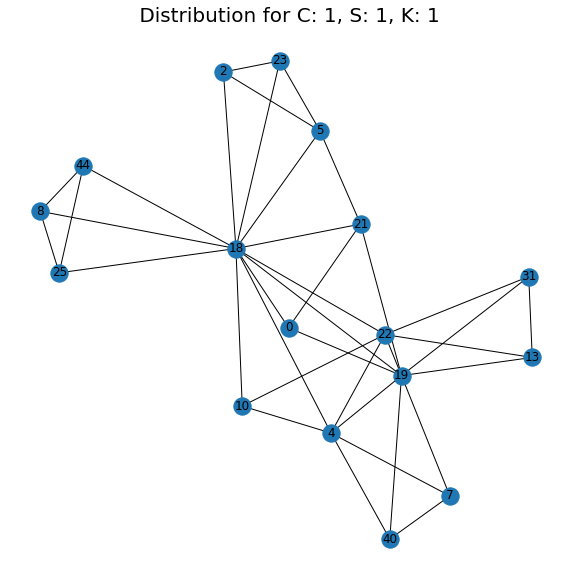

[44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 44, 'adj_start': 108, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A58>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920A58>}
{'course': 8, 'adj_start': 24, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 18, 'adj_start': 45, 'degree': 11, 'degree_start': 12, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 25, 'adj_start': 81, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920B70>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 25
list:  0
[44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  

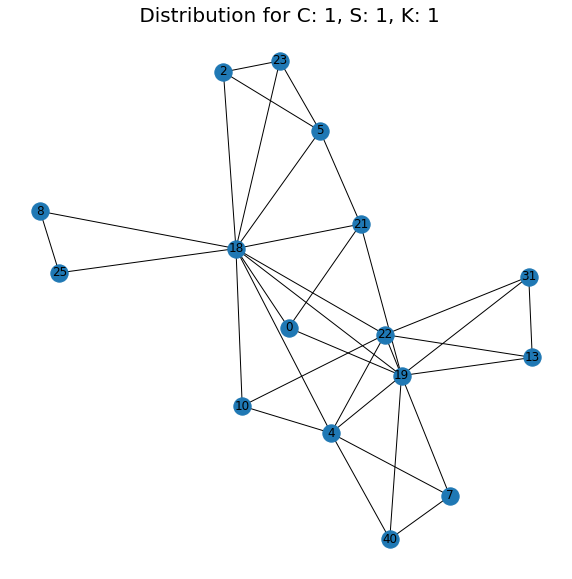

[25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 25, 'adj_start': 81, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F9272E8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F9272E8>}
{'course': 8, 'adj_start': 24, 'degree': 1, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 18, 'adj_start': 45, 'degree': 10, 'degree_start': 12, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 1
new i: 1
course: 8
list:  0
[25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
[8]
list:  2
List has no element
list:  3
[40, 31, 23, 13, 10, 7, 2, 0]
list:  4
[21, 5]
list:  5
List has no element
list:  6
[22, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[19]
list:  1

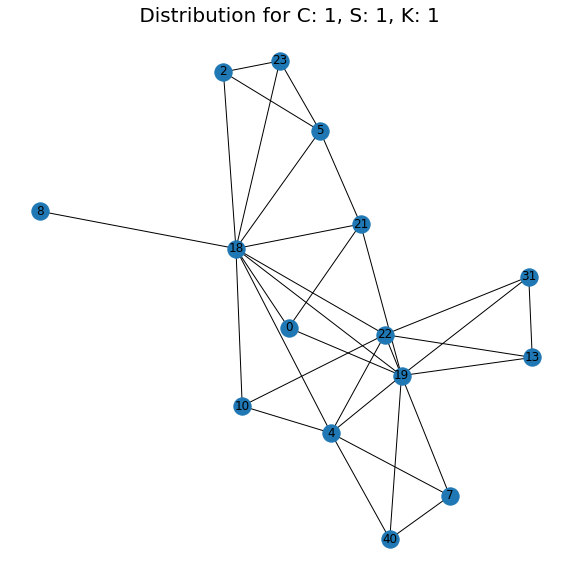

[8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 8, 'adj_start': 24, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920F28>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920F28>}
{'course': 18, 'adj_start': 45, 'degree': 9, 'degree_start': 12, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DD8>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 31
list:  0
[8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[40, 31, 23, 13, 10, 7, 2, 0]
list:  4
[21, 5]
list:  5
List has no element
list:  6
[22, 4]
list:  7
List has no element
list:  8
List has no element
list:  9
[18, 19]
list:  10
List has no element
list:  11
List has no element
list:  12
List has no element


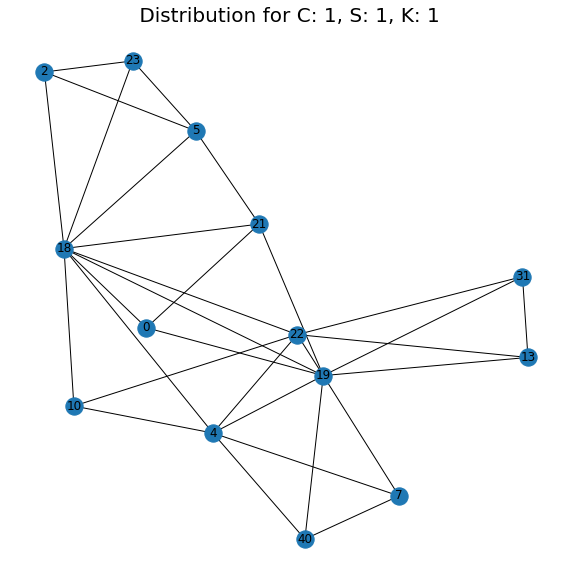

[31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 31, 'adj_start': 93, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920B70>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920B70>}
{'course': 13, 'adj_start': 33, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 22, 'adj_start': 72, 'degree': 5, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 13
list:  0
[31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
[13]
list:  3
[40

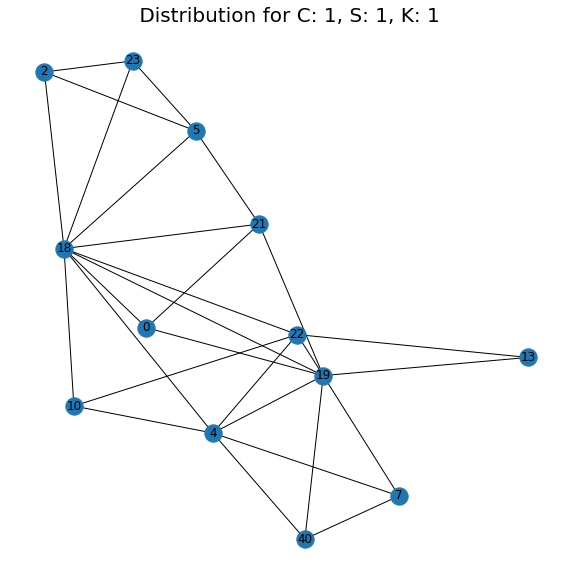

[13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 13, 'adj_start': 33, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F9206D8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F9206D8>}
{'course': 19, 'adj_start': 57, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 22, 'adj_start': 72, 'degree': 4, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E48>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 23
list:  0
[13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[40, 23, 10, 7, 2, 0]
list:  4
[22, 21, 5]
list:  5
List has no element
list:  6
[4]
list:  7


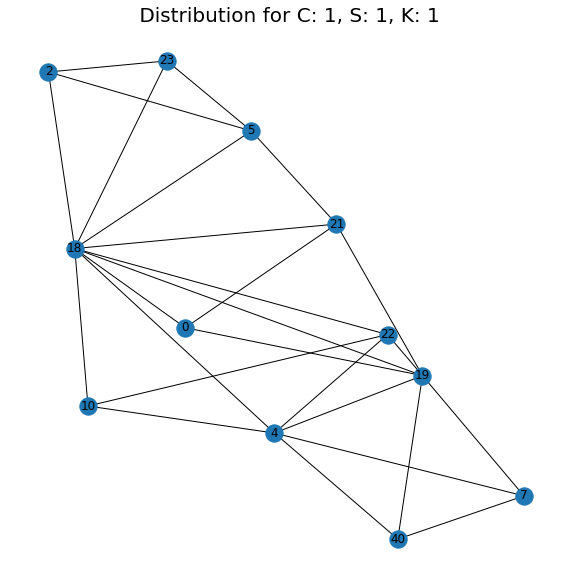

[23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 23, 'adj_start': 78, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920C88>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920C88>}
{'course': 2, 'adj_start': 3, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 5, 'adj_start': 15, 'degree': 3, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F927208>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 18, 'adj_start': 45, 'degree': 8, 'degree_start': 12, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 2
list:  0
[23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
lis

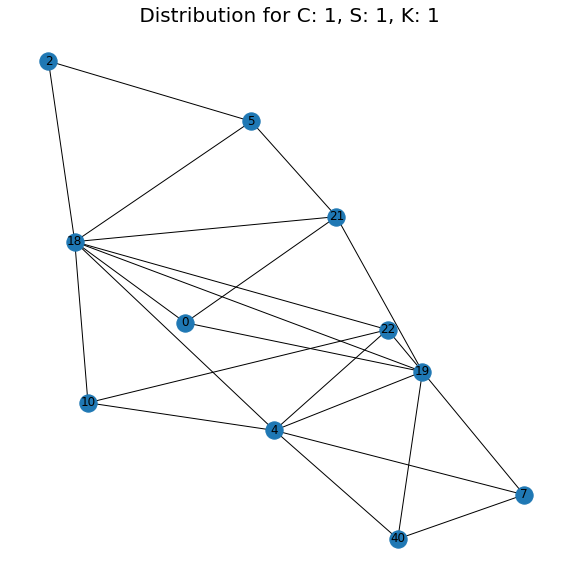

[2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 2, 'adj_start': 3, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920EB8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920EB8>}
{'course': 5, 'adj_start': 15, 'degree': 2, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 18, 'adj_start': 45, 'degree': 7, 'degree_start': 12, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DD8>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 5
list:  0
[2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
[5]
list:  3
[40, 10, 7, 0]
list:  4
[22, 21]
list:  5
List has no element
list:  6
[4]
list:  7
[18, 19]
list:  8

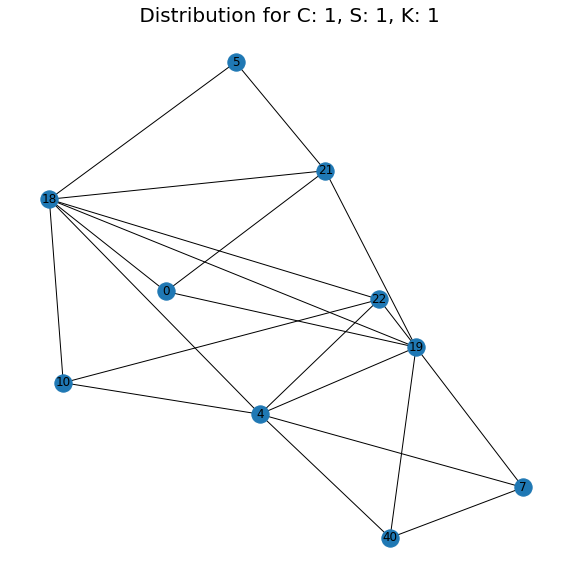

[5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 5, 'adj_start': 15, 'degree': 0, 'degree_start': 6, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A20>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920A20>}
{'course': 18, 'adj_start': 45, 'degree': 6, 'degree_start': 12, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A90>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 21, 'adj_start': 66, 'degree': 3, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F927208>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 40
list:  0
[5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[21, 40, 10, 7, 0]
list:  4
[22]
li

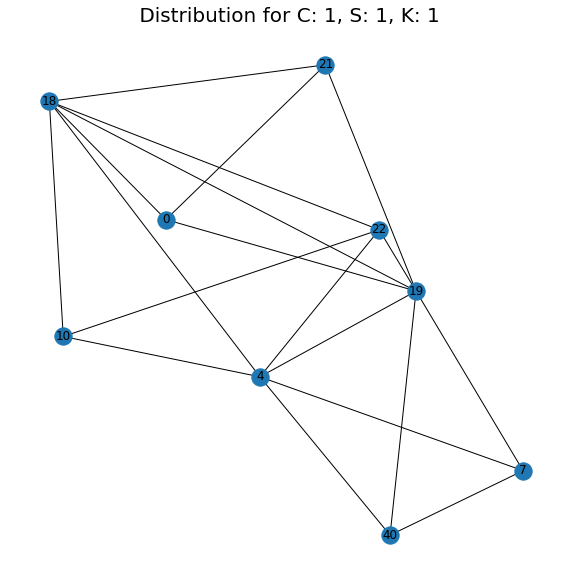

[40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 40, 'adj_start': 102, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920AC8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920AC8>}
{'course': 4, 'adj_start': 9, 'degree': 5, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 7, 'adj_start': 21, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DA0>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 7
list:  0
[40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 1

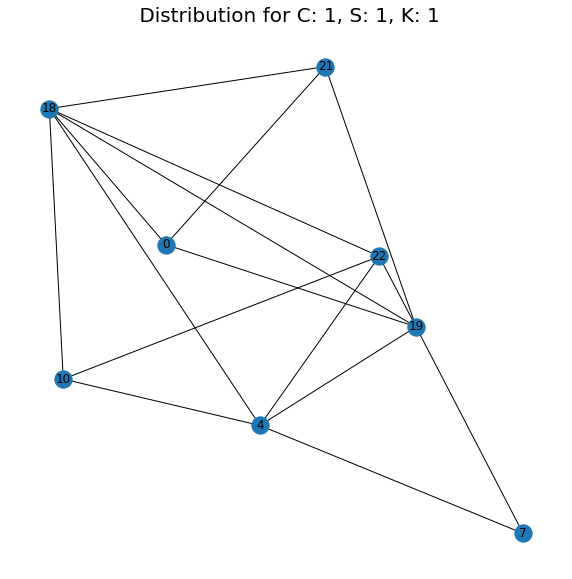

[7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 7, 'adj_start': 21, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F927208>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F927208>}
{'course': 4, 'adj_start': 9, 'degree': 4, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E80>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 10
list:  0
[7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
[21, 10, 0]
list:  4
[4, 22]
list:  5
[19]
list:  6
[18]
list: 

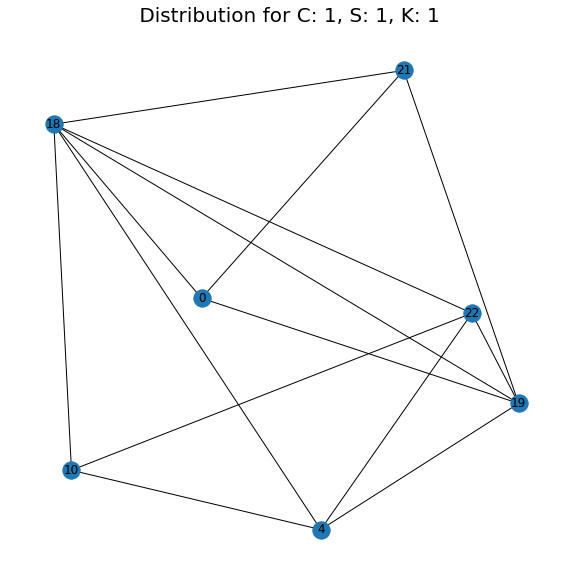

[10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 10, 'adj_start': 30, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920B38>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920B38>}
{'course': 4, 'adj_start': 9, 'degree': 3, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E48>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 18, 'adj_start': 45, 'degree': 5, 'degree_start': 12, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DD8>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 22, 'adj_start': 72, 'degree': 3, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A90>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 3
new i: 3
course: 22
list:  0
[10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30

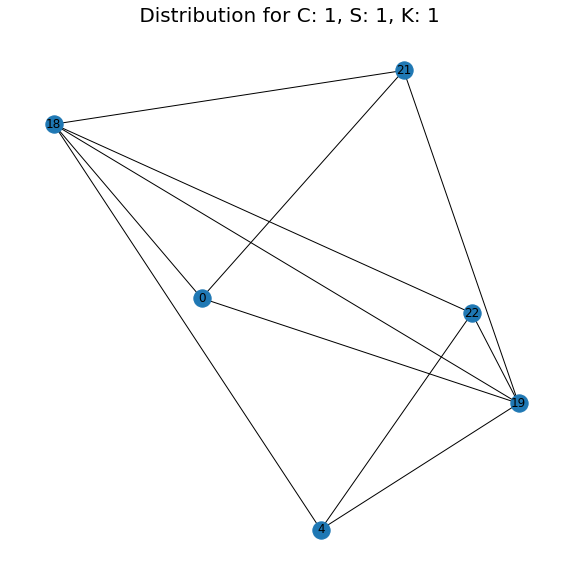

[22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 22, 'adj_start': 72, 'degree': 0, 'degree_start': 6, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920BE0>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920BE0>}
{'course': 4, 'adj_start': 9, 'degree': 2, 'degree_start': 6, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 18, 'adj_start': 45, 'degree': 4, 'degree_start': 12, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DA0>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 4
list:  0
[22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29

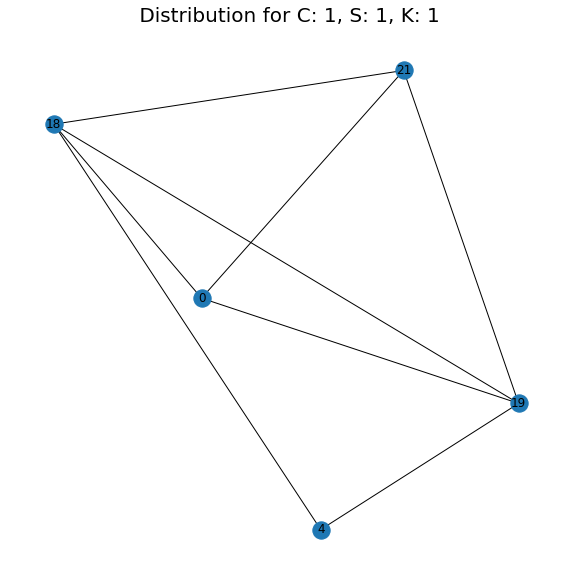

[4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 4, 'adj_start': 9, 'degree': 0, 'degree_start': 6, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E80>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920E80>}
{'course': 18, 'adj_start': 45, 'degree': 3, 'degree_start': 12, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E48>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 3, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DA0>, 'pref_degree_list': None, 'color': -1}
start: 3
Continue...
new i: 3
course: 18
list:  0
[4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
List has no element
list:  2
List has no element
list:  3


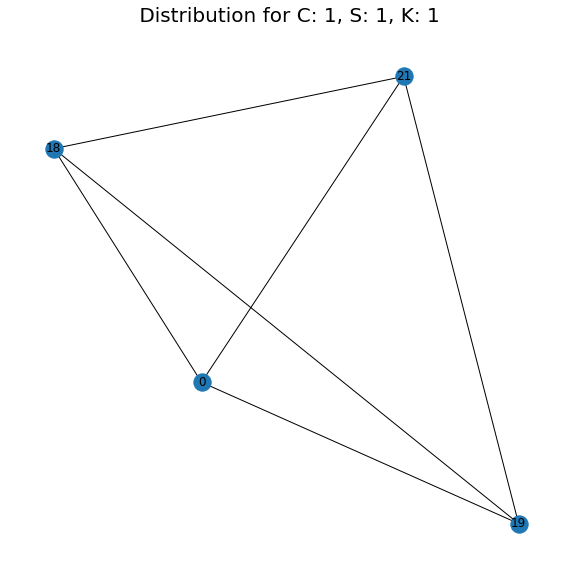

[18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 18, 'adj_start': 45, 'degree': 0, 'degree_start': 12, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920A90>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920A90>}
{'course': 0, 'adj_start': 0, 'degree': 2, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 2, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F9209B0>, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 21, 'adj_start': 66, 'degree': 2, 'degree_start': 6, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DD8>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 2
new i: 2
course: 21
list:  0
[18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 

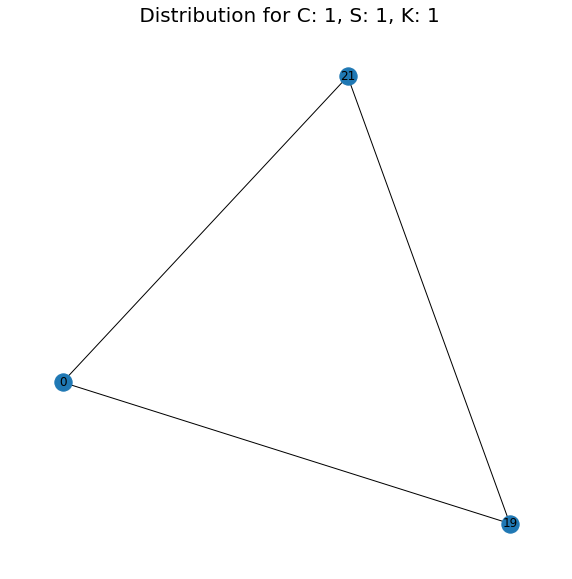

[21, 18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 21, 'adj_start': 66, 'degree': 0, 'degree_start': 6, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DA0>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920DA0>}
{'course': 0, 'adj_start': 0, 'degree': 1, 'degree_start': 3, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1}
start: 3
{'course': 19, 'adj_start': 57, 'degree': 1, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F9209B0>, 'pref_degree_list': None, 'color': -1}
start: 3
Case 1: 1
new i: 1
course: 19
list:  0
[21, 18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49, 48, 46, 43, 41, 39, 38, 37, 36, 35, 32, 29, 28, 26, 24, 20, 17, 15, 12, 11, 6, 1]
list:  1
[19, 0]
list:  2
List has no element
list:  3
List has no element
list:  4
List has 

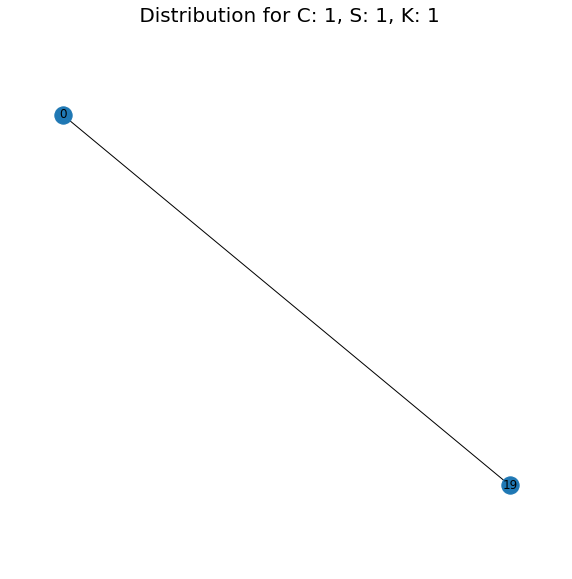

[19, 21, 18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 19, 'adj_start': 57, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920E48>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920E48>}
{'course': 0, 'adj_start': 0, 'degree': 0, 'degree_start': 3, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DD8>, 'pref_degree_list': None, 'color': -1}
[0, 19, 21, 18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]
{'course': 0, 'adj_start': 0, 'degree': 0, 'degree_start': 3, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x000001147F920DD8>, 'pref_degree_list': None, 'color': -1, 'ref': <toolkit.Node object at 0x000001147F920DD8>}
start: 3
Case 1: 0
------------------ 4
------------------ 5
------------------ 6
------------------ 7
------------------ 8
----------

In [16]:
for i in range(1, max_degree):
    print('------------------', i)
    n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=i, start=i, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos=pos)

In [17]:
coloring_order = ordered.traverse_list()

[0, 19, 21, 18, 4, 22, 10, 7, 40, 5, 2, 23, 13, 31, 8, 25, 44, 3, 27, 42, 16, 30, 34, 47, 9, 14, 45, 33, 49]


In [18]:
for x in adj:
    x.color = -1

In [19]:
def crayon(coloring_order=coloring_order, adj=adj, max_degree=max_degree):
    
    for course in coloring_order:
        print('course:', course)
        if adj[course].degree_start > 0:
            taken = []
            options = [-1] * max_degree
            for j in range(adj[course].adj_start, adj[course].adj_start + adj[course].degree_start):
                if adj[E[j]].color >= 0:
                    taken.append(adj[E[j]].color)
            if len(taken) == 0:
                adj[course].color = 0
            elif len(taken) > 0:
                for i in taken:
                    options[i] = 1
                
            print(taken)
            for k in range(0,len(options)):
                if options[k] == -1:
                    print('c:', k)
                    adj[course].color = k
                    break
    
    return adj
                    

In [20]:
adj = crayon(coloring_order, adj)

course: 0
[]
c: 0
course: 19
[0]
c: 1
course: 21
[0, 1]
c: 2
course: 18
[0, 1, 2]
c: 3
course: 4
[3, 1]
c: 0
course: 22
[0, 3, 1]
c: 2
course: 10
[0, 3, 2]
c: 1
course: 7
[0, 1]
c: 2
course: 40
[0, 2, 1]
c: 3
course: 5
[3, 2]
c: 0
course: 2
[0, 3]
c: 1
course: 23
[1, 0, 3]
c: 2
course: 13
[1, 2]
c: 0
course: 31
[0, 1, 2]
c: 3
course: 8
[3]
c: 0
course: 25
[0, 3]
c: 1
course: 44
[0, 3, 1]
c: 2
course: 3
[]
c: 0
course: 27
[0]
c: 1
course: 42
[0, 1]
c: 2
course: 16
[0, 1, 2]
c: 3
course: 30
[1]
c: 0
course: 34
[1, 0]
c: 2
course: 47
[1, 0, 2]
c: 3
course: 9
[3]
c: 0
course: 14
[0, 3]
c: 1
course: 45
[0, 1, 3]
c: 2
course: 33
[0, 2]
c: 1
course: 49
[0, 2, 1]
c: 3


In [21]:
colors = []
for n in coloring_order:
    if adj[n].degree_start >= 1:
        colors.append(adj[n].color)

In [22]:
color_map = {0: 'blue', 1: 'green', 2:'black', 3: 'red', 4: 'orange', 5:'purple', 6:'violet', 7:'hotpink', 8:'chocolate', 9:'palegreen', 10:'thistle' }

In [23]:
color_graph= [color_map[k] for k in colors]

In [24]:
G = nx.Graph()
G.add_edges_from(edges2)
pos = nx.spring_layout(G,k=0.25,iterations=25)

In [25]:
courses_per = int(test_cases[index].split('_')[1])
students = int(test_cases[index].split('_')[5].strip('.txt'))

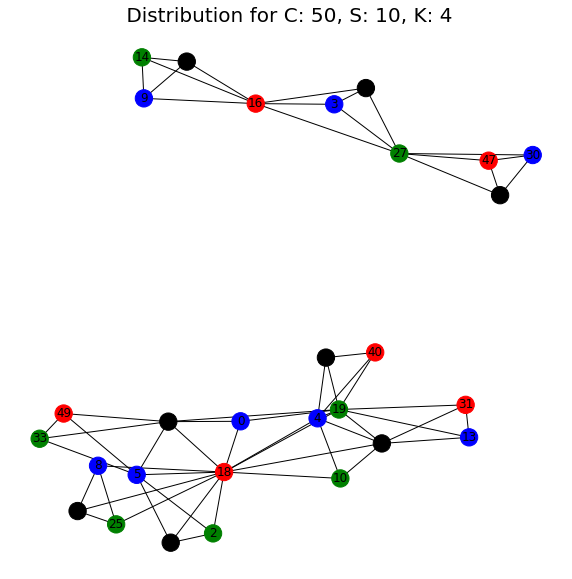

In [26]:
network_vis2(Edges=edges2, pos=pos, courses_per=courses_per, students=students, classes=C, nodes=coloring_order, colors=color_graph)